In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
from collections import Counter

%matplotlib inline


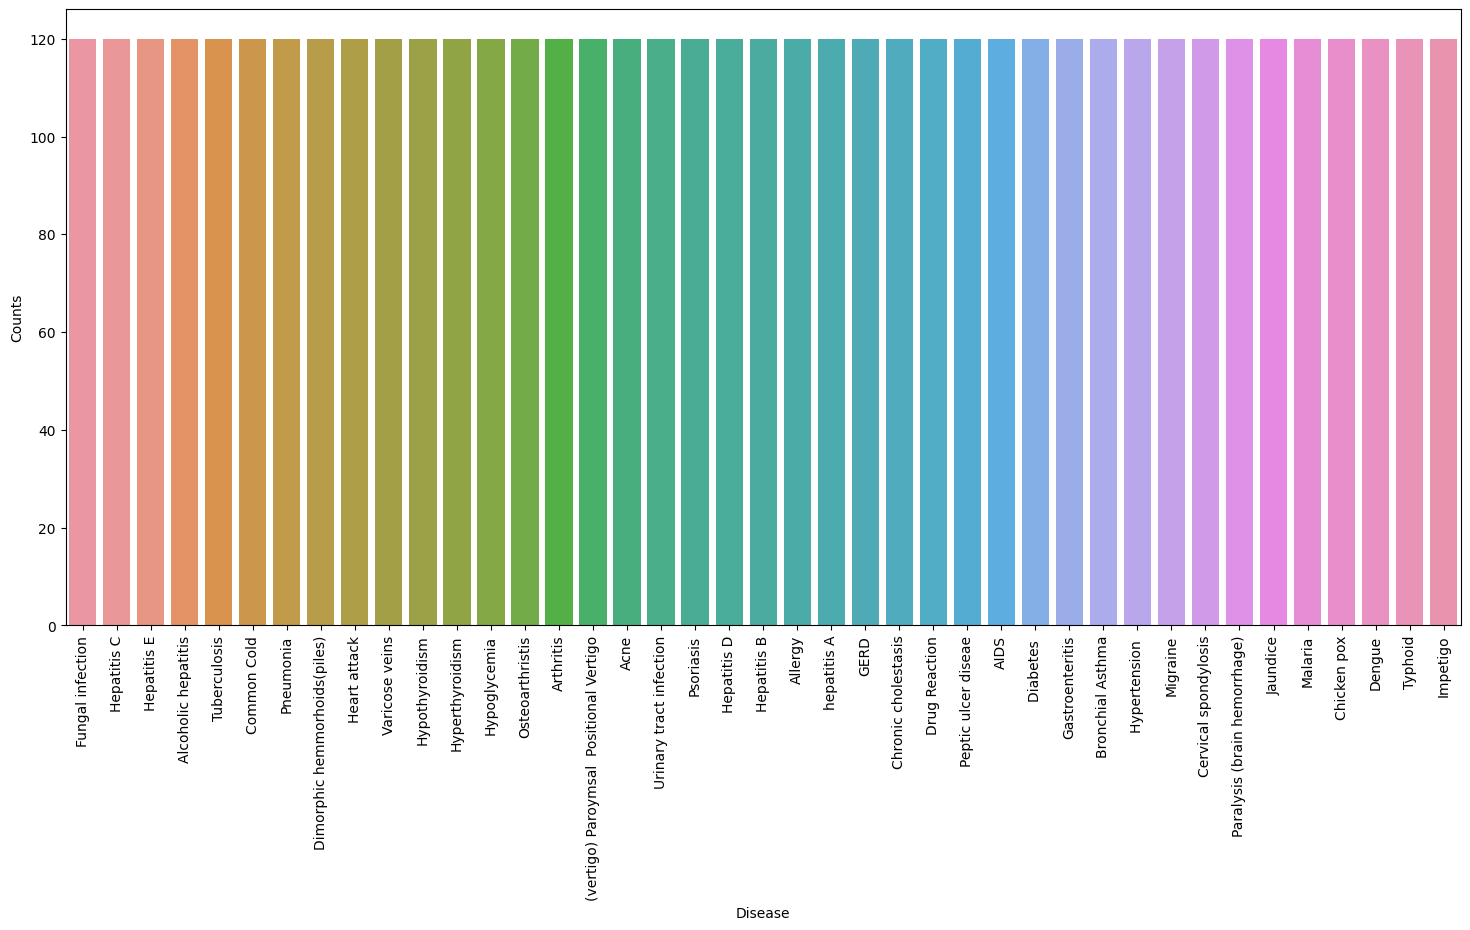

In [ ]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.3, random_state = 48)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3444, 132), (3444,)
Test: (1476, 132), (1476,)


In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18),
 "Knearest Neighbours":KNeighborsClassifier(n_neighbors=5),
 "Logistic Regression": LogisticRegression()
}

# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, X, y, cv = 10,
							n_jobs = -1,
							scoring = cv_scoring)
	print("=="*30)
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Knearest Neighbours
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Logistic Regression
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create a synthetic dataset with noise
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=1, random_state=42, flip_y=0.2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Initialize the SVM model
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
preds = svm_model.predict(X_test)

# Calculate and print the accuracy
test_accuracy = accuracy_score(y_test, preds)
print("Accuracy on test data: {:.2f}%".format(100 * test_accuracy))


Accuracy on test data: 88.00%


In [ ]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")

precision_train = precision_score(y_train, svm_model.predict(X_train))
precision_test = precision_score(y_test, preds)
print(f"Precision on train data by SVM Classifier: {precision_train * 100:.2f}")
print(f"Precision on test data by SVM Classifier: {precision_test * 100:.2f}")

recall_train = recall_score(y_train, svm_model.predict(X_train))
recall_test = recall_score(y_test, preds)
print(f"Recall on train data by SVM Classifier: {recall_train * 100:.2f}")
print(f"Recall on test data by SVM Classifier: {recall_test * 100:.2f}")

f1_score_train = f1_score(y_train, svm_model.predict(X_train))
f1_score_test = f1_score(y_test, preds)
print(f"F1 Score on train data by SVM Classifier: {f1_score_train * 100:.2f}")
print(f"F1 Score on test data by SVM Classifier: {f1_score_test * 100:.2f}")

mae = mean_absolute_error(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
rmse = np.sqrt(mse)

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()


# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)

print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")

precision_train = precision_score(y_train, nb_model.predict(X_train))
precision_test = precision_score(y_test, preds)
print(f"Precision on train data by Naive Bayes Classifier: {precision_train * 100:.2f}")
print(f"Precision on test data by Naive Bayes Classifier: {precision_test * 100:.2f}")

recall_train = recall_score(y_train, nb_model.predict(X_train))
recall_test = recall_score(y_test, preds)
print(f"Recall on train data by Naive Bayes Classifier: {recall_train * 100:.2f}")
print(f"Recall on test data by Naive Bayes Classifier: {recall_test * 100:.2f}")

f1_score_train = f1_score(y_train, nb_model.predict(X_train))
f1_score_test = f1_score(y_test, preds)
print(f"F1 Score on train data by Naive Bayes Classifier: {f1_score_train * 100:.2f}")
print(f"F1 Score on test data by Naive Bayes Classifier: {f1_score_test * 100:.2f}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()


# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

precision_train = precision_score(y_train, rf_model.predict(X_train))
precision_test = precision_score(y_test, preds)
print(f"Precision on train data by Random Forest Classifier: {precision_train * 100:.2f}")
print(f"Precision on test data by Random Forest Classifier: {precision_test * 100:.2f}")

recall_train = recall_score(y_train, rf_model.predict(X_train))
recall_test = recall_score(y_test, preds)
print(f"Recall on train data by Random Forest Classifier: {recall_train * 100:.2f}")
print(f"Recall on test data by Random Forest Classifier: {recall_test * 100:.2f}")

f1_score_train = f1_score(y_train, rf_model.predict(X_train))
f1_score_test = f1_score(y_test, preds)
print(f"F1 Score on train data by Random Forest Classifier: {f1_score_train * 100:.2f}")
print(f"F1 Score on test data by Random Forest Classifier: {f1_score_test * 100:.2f}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


# Training and testing the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_model.fit(X_train, y_train)
preds_knn = knn_model.predict(X_test)

train_accuracy_knn = accuracy_score(y_train, knn_model.predict(X_train)) * 100
test_accuracy_knn = accuracy_score(y_test, preds_knn) * 100
print(f"Accuracy on train data by K-Nearest Neighbors: {train_accuracy_knn:.2f}%")
print(f"Accuracy on test data by K-Nearest Neighbors: {test_accuracy_knn:.2f}%")

precision_train_knn = precision_score(y_train, knn_model.predict(X_train))
precision_test_knn = precision_score(y_test, preds_knn)
print(f"Precision on train data by K-Nearest Neighbors: {precision_train_knn * 100:.2f}")
print(f"Precision on test data by K-Nearest Neighbors: {precision_test_knn * 100:.2f}")

recall_train_knn = recall_score(y_train, knn_model.predict(X_train))
recall_test_knn = recall_score(y_test, preds_knn)
print(f"Recall on train data by K-Nearest Neighbors: {recall_train_knn * 100:.2f}")
print(f"Recall on test data by K-Nearest Neighbors: {recall_test_knn * 100:.2f}")

f1_score_train_knn = f1_score(y_train, knn_model.predict(X_train))
f1_score_test_knn = f1_score(y_test, preds_knn)
print(f"F1 Score on train data by K-Nearest Neighbors: {f1_score_train_knn * 100:.2f}")
print(f"F1 Score on test data by K-Nearest Neighbors: {f1_score_test_knn * 100:.2f}")

cf_matrix_knn = confusion_matrix(y_test, preds_knn)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_knn, annot=True)
plt.title("Confusion Matrix for K-Nearest Neighbors on Test Data")
plt.show()


# Training and testing the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
preds_lr = logistic_model.predict(X_test)

train_accuracy_lr = accuracy_score(y_train, logistic_model.predict(X_train)) * 100
test_accuracy_lr = accuracy_score(y_test, preds_lr) * 100
print(f"Accuracy on train data by Logistic Regression: {train_accuracy_lr:.2f}%")
print(f"Accuracy on test data by Logistic Regression: {test_accuracy_lr:.2f}%")

precision_train_lr = precision_score(y_train, logistic_model.predict(X_train))
precision_test_lr = precision_score(y_test, preds_lr)
print(f"Precision on train data by Logistic Regression: {precision_train_lr * 100:.2f}")
print(f"Precision on test data by Logistic Regression: {precision_test_lr * 100:.2f}")

recall_train_lr = recall_score(y_train, logistic_model.predict(X_train))
recall_test_lr = recall_score(y_test, preds_lr)
print(f"Recall on train data by Logistic Regression: {recall_train_lr * 100:.2f}")
print(f"Recall on test data by Logistic Regression: {recall_test_lr * 100:.2f}")

f1_train_lr = f1_score(y_train, logistic_model.predict(X_train))
f1_test_lr = f1_score(y_test, preds_lr)
print(f"F1 Score on train data by Logistic Regression: {f1_train_lr * 100:.2f}")
print(f"F1 Score on test data by Logistic Regression: {f1_test_lr * 100:.2f}")

cf_matrix_lr = confusion_matrix(y_test, preds_lr)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_lr, annot=True)
plt.title("Confusion Matrix for Logistic Regression on Test Data")
plt.show()


Accuracy on train data by SVM Classifier: 91.57142857142857
Accuracy on test data by SVM Classifier: 88.0
Precision on train data by SVM Classifier: 91.43
Precision on test data by SVM Classifier: 89.40
Recall on train data by SVM Classifier: 91.69
Recall on test data by SVM Classifier: 87.10
F1 Score on train data by SVM Classifier: 91.56
F1 Score on test data by SVM Classifier: 88.24


NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

Accuracy on Test dataset by the combined model: 4.76%
Precision on Test dataset by the combined model: 0.27%
Recall on Test dataset by the combined model: 4.76%
F1 Score on Test dataset by the combined model: 0.50


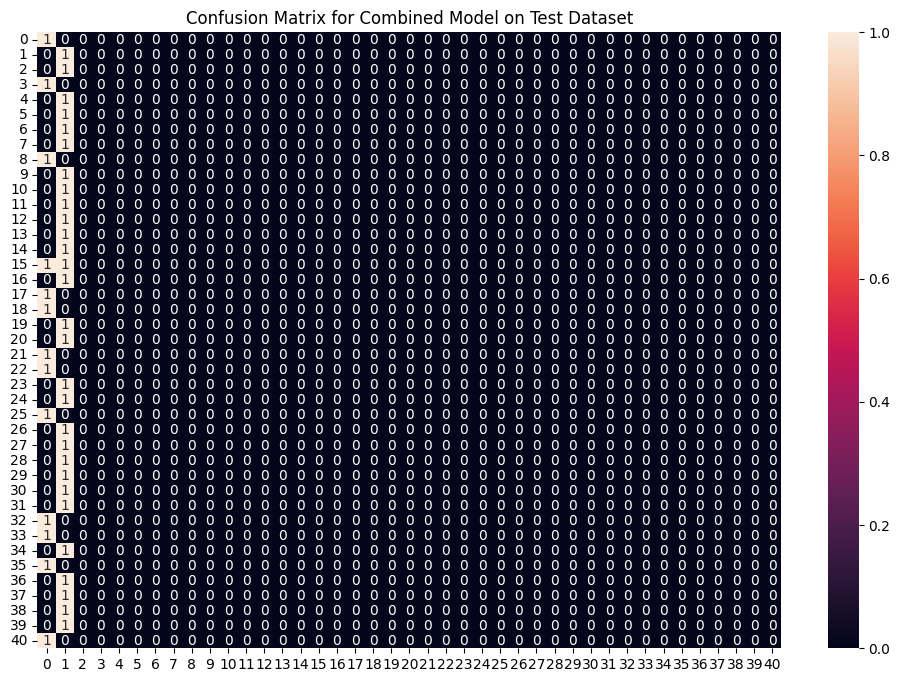

In [ ]:
# Load the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

# Assuming you have X and y defined for training
final_lr_model = LogisticRegression()
final_knn_model = KNeighborsClassifier(n_neighbors=5)
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_lr_model.fit(X, y)
final_knn_model.fit(X, y)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Extract the features and labels from the test data
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Select only the first 20 features from the test data
test_X = test_X.iloc[:, :20]

# Making predictions by taking the mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
knn_preds = final_knn_model.predict(test_X)
lr_preds = final_lr_model.predict(test_X)

# Combine predictions by majority voting
final_preds = []
for i, j, k, l, m in zip(svm_preds, nb_preds, rf_preds, knn_preds, lr_preds):
    combined_prediction = Counter([i, j, k, l, m]).most_common(1)[0][0]
    final_preds.append(combined_prediction)

# Ensure that test_Y is not None or empty
if test_Y is not None:
    accuracy = accuracy_score(test_Y, final_preds)
    precision = precision_score(test_Y, final_preds, average='weighted')
    recall = recall_score(test_Y, final_preds, average='weighted')
    f1 = f1_score(test_Y, final_preds, average='weighted')

    print(f"Accuracy on Test dataset by the combined model: {accuracy * 100:.2f}%")
    print(f"Precision on Test dataset by the combined model: {precision * 100:.2f}%")
    print(f"Recall on Test dataset by the combined model: {recall * 100:.2f}%")
    print(f"F1 Score on Test dataset by the combined model: {f1 * 100:.2f}")

    cf_matrix = confusion_matrix(test_Y, final_preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title("Confusion Matrix for Combined Model on Test Dataset")
    plt.show()
else:
    print("No true labels (test_Y) available.")


In [ ]:
# Define your DataFrame 'df' with symptom columns
# Replace this with your actual data
data = {
    'Itching': [1, 0, 1, 0, 1],
    'Skin_Rash': [0, 1, 1, 1, 0],
    'Nodal_Skin_Eruptions': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Define your encoder for classes
# Replace 'YourEncoder' with your actual encoder object
class YourEncoder:
    def transform(self, data):
        # Implement the transformation logic for your encoder
        pass

encoder = YourEncoder()

# Define your symptoms and the symptom index
symptoms = df.columns
symptom_index = {symptom: index for index, symptom in enumerate(symptoms)}

data_dict = {
    "symptom_index": symptom_index
}

# Define and train your machine learning models (final_rf_model, final_nb_model, final_svm_model, final_knn_model, final_lr_model)

# Rest of the code as previously provided
# ...

# Testing the function
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # Creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"].get(symptom)
        if index is not None:
            input_data[index] = 1

    # Ensure the input data has the same number of features as expected by the RandomForestClassifier
    while len(input_data) < 20:
        input_data.append(0)

    # Reshaping the input data and converting it into a suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # Generating individual model outputs
    rf_prediction = final_rf_model.predict(input_data)
    nb_prediction = final_nb_model.predict(input_data)
    svm_prediction = final_svm_model.predict(input_data)
    knn_prediction = final_knn_model.predict(input_data)
    lr_prediction = final_lr_model.predict(input_data)

    # Create a list to store model predictions
    predictions = [rf_prediction[0], nb_prediction[0], svm_prediction[0]]

    # Calculate the most common prediction among the models
    final_prediction = max(set(predictions), key=predictions.count)

    final_predictions = {
        "rf_model_prediction": rf_prediction[0],
        "naive_bayes_prediction": nb_prediction[0],
        "svm_model_prediction": svm_prediction[0],
        "knn_model_prediction": knn_prediction[0],
        "lr_model_prediction": lr_prediction[0],
        "final_prediction": final_prediction
    }

    return final_predictions

# Example of using the predictDisease function
symptoms = "Itching, Skin_Rash, Nodal_Skin_Eruptions"  # Replace with your symptoms
predictions = predictDisease(symptoms)
print(predictions)

{'rf_model_prediction': 0, 'naive_bayes_prediction': 1, 'svm_model_prediction': 1, 'knn_model_prediction': 1, 'lr_model_prediction': 1, 'final_prediction': 1}
